# Análisis de los 25 retailers más grandes de Estados Unidos

In [1]:
# Importar librerías aquí
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importar datos aquí
df = pd.read_csv('largest_us_retailers.csv')
df

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club
3,Home Depot,83976,1965.0,42.735878,0.000000,Home Improvement
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores
5,CVS incl. Target,77792,9813.0,8.825959,0.255662,Drug Stores
6,Amazon,71687,NaN,NaN,NaN,Electronic/Mail Order
7,Target,71208,1772.0,39.982033,-0.010056,Supercenters
8,Lowe's,60311,1828.0,33.311792,0.019520,Home Improvement
9,Albertsons,56829,2326.0,23.877731,-0.044371,Grocery


### Explorando el dataset

In [3]:
df.shape

(25, 6)

In [4]:
df.columns

Index(['Company', 'Sales', 'Stores', 'Sales/Avg. Store', 'Store Count Growth',
       'Category'],
      dtype='object')

### Exploración de los valores nulos

In [5]:
df.isnull().sum()

Company               0
Sales                 0
Stores                2
Sales/Avg. Store      2
Store Count Growth    2
Category              1
dtype: int64

In [6]:
df["Stores"]=df["Stores"].fillna(0)
df["Sales/Avg. Store"]=df["Sales/Avg. Store"].fillna(0)
df["Store Count Growth"]=df["Store Count Growth"].fillna(0)
df["Category"]=df["Category"].fillna('None')
df

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club
3,Home Depot,83976,1965.0,42.735878,0.000000,Home Improvement
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores
5,CVS incl. Target,77792,9813.0,8.825959,0.255662,Drug Stores
6,Amazon,71687,0.0,0.000000,0.000000,Electronic/Mail Order
7,Target,71208,1772.0,39.982033,-0.010056,Supercenters
8,Lowe's,60311,1828.0,33.311792,0.019520,Home Improvement
9,Albertsons,56829,2326.0,23.877731,-0.044371,Grocery


## I. Preguntas del negocio

### 1. ¿Cuál es el promedio de ventas sin contar a la compañía dominante?

Buscando conocer la compañia dominante en ventas:

In [7]:
df.sort_values('Sales',ascending=False)[['Company','Sales']].head(1)

,Company,Sales
0,Walmart US,658119


<p>Descartando a la compañía <strong><mark style="background: rgba(251, 243, 219, 1);">Walmart</mark></strong><strong> </strong>como compañía dominante. Se obtiene el siguiente resultado sobre el promedio de ventas</p>

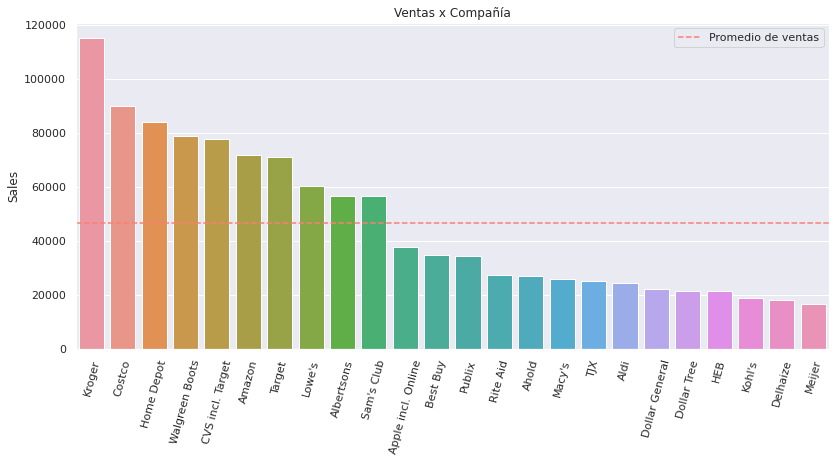

In [9]:
df_without_walmart= df[df.Company != 'Walmart US'] # Data frame without Walmart
sns.set()
figure, axes= plt.subplots(figsize=(13.5,6), gridspec_kw={"height_ratios": [3]});
sns.barplot(data=df_without_walmart,x='Company',y='Sales',ax=axes)
axes.axhline(df_without_walmart['Sales'].mean(),ls='--',label='Promedio de ventas',color='Salmon')
axes.tick_params(axis='x', rotation=75);axes.set(xlabel=None)
plt.title('Ventas x Compañía')
plt.legend()
plt.show()

<p>&emsp;A través de la grafica <b>Ventas x Compañía</b> se aprecia que las primeras diez compañías de retail en EE.UU. tienen la mayoría de las ventas, a comparación de las compañías consecutivas.  Obteniendo un promedio de ventas de <strong><mark style="background: rgba(251, 243, 219, 1);"> 4,6602.42 </mark></strong><strong> </strong>entre la décima y onceava compañía.</p>

### 2. ¿Cuánto dinero en ventas generó la mayoría de las compañías?

<p> Para el siguiente análisis se descacatará <strong><mark style="background: rgba(251, 243, 219, 1);">Walmart</mark></strong><strong> </strong> para obtener la mayoría de los retails en ventas.</p>

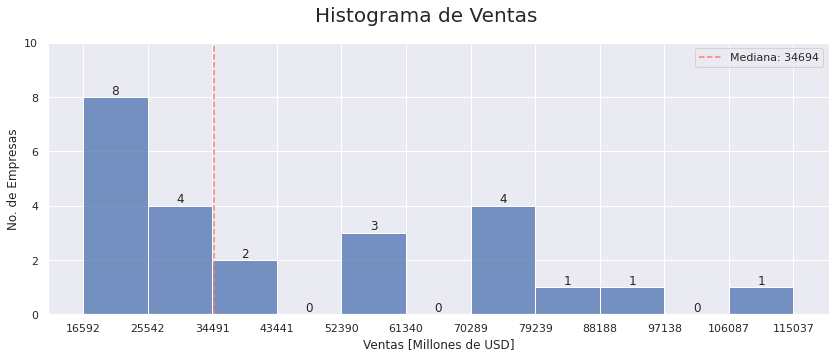

In [24]:
# Mediana en ventas
median = df_without_walmart.Sales.median()
# Graph
count, aux_bins=np.histogram(df_without_walmart['Sales'],bins=11)
figure, axes = plt.subplots(figsize=(14,5))
sns.set()
sns.histplot(df_without_walmart,x='Sales', ax=axes,bins=aux_bins)
axes.set(xticks=aux_bins); axes.set_ylim([0,10])
axes.set_xlabel('Ventas [Millones de USD]'); axes.set_ylabel('No. de Empresas')
figure.suptitle('Histograma de Ventas',size=20)
axes.bar_label(axes.containers[0])
mediana = np.median(df_without_walmart['Sales'])
axes.axvline(mediana, ls='--', color='Salmon', label='Mediana: %d'%mediana)
axes.legend()
plt.show()





Observando la gráfica de **Histograma de Ventas** se muestra que la mayoría de retails, siendo 14, están entre los <u>16,592 y 43,441 en ventas [Millones de USD]</u>. Además, existen pocas compañías que tienen mayores ventas por fuera de la *mediana* en ventas.

### 3. ¿Cuántas tiendas tiene la mayoría de las compañías?

### 4. ¿La cantidad de tiendas está relacionada con la cantidad de ventas? Es decir, ¿si una empresa tiene más tiendas tendrá más dinero de ventas?

### 5. ¿Cuál es el rango que existe entre las ventas?

### 6. ¿Cuáles son las 5 empresas que más tiendas físicas tienen? ¿Cuáles de ellas están dentro de las 5 empresas que más ventas tuvieron?

## II.&nbsp;Preguntas&nbsp;opcionales

### 7. ¿Qué categoría de compañía generó más ventas?

### 8. ¿Cuál es la compañía que en relación con su cantidad de tiendas físicas genera más ventas?

### 9. ¿Cuáles compañías venden de forma exclusivamente online? ¿Sus ventas destacan sobre las que también tienen tiendas físicas?

## III. Tus propias preguntas

### 10. Pregunta

### 11. Pregunta

### 12. Pregunta

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a773c954-66af-417f-bc3e-969ec3394874' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>